In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
raw_data = pd.read_csv('data.csv')
raw_data

Benchmark  Baseline   Griffin
0        bs  0.001621  0.001480
1        km  0.002424  0.001781
2       bfs  1.000000  1.000000
3       fir  0.001485  0.001391
4       flw  0.001437  0.001509
5        mt  0.003543  0.001427
6        pr  1.000000  1.000000
7        fw  0.001557  0.001508
8        st  0.002972  0.001472
9        sc  0.001641  0.001357

In [3]:
shootdown_data = pd.read_csv('shootdown.csv')
shootdown_data.columns = ['Benchmark', 'Baseline Shootdown', 'Griffin Shootdown']
shootdown_data

Benchmark  Baseline Shootdown  Griffin Shootdown
0        bs                2676               1168
1        km                6224                747
2       bfs                   1                  1
3       fir                2595               1599
4       flw                2575               1424
5        mt                8192                768
6        pr                   1                  1
7        fw                3078               2201
8        st                7135               2474
9        sc                 409                364

In [4]:
data = pd.merge(raw_data, shootdown_data, on='Benchmark', how='inner')
data

Benchmark  Baseline   Griffin  Baseline Shootdown  Griffin Shootdown
0        bs  0.001621  0.001480                2676               1168
1        km  0.002424  0.001781                6224                747
2       bfs  1.000000  1.000000                   1                  1
3       fir  0.001485  0.001391                2595               1599
4       flw  0.001437  0.001509                2575               1424
5        mt  0.003543  0.001427                8192                768
6        pr  1.000000  1.000000                   1                  1
7        fw  0.001557  0.001508                3078               2201
8        st  0.002972  0.001472                7135               2474
9        sc  0.001641  0.001357                 409                364

In [5]:
computed_data = data
computed_data['Baseline'] = computed_data['Baseline'] + computed_data['Baseline Shootdown'] * 1e-7
computed_data['Griffin'] = computed_data['Griffin'] + computed_data['Griffin Shootdown'] * 1e-7
computed_data

Benchmark  Baseline   Griffin  Baseline Shootdown  Griffin Shootdown
0        bs  0.001888  0.001597                2676               1168
1        km  0.003046  0.001856                6224                747
2       bfs  1.000000  1.000000                   1                  1
3       fir  0.001745  0.001551                2595               1599
4       flw  0.001695  0.001651                2575               1424
5        mt  0.004362  0.001504                8192                768
6        pr  1.000000  1.000000                   1                  1
7        fw  0.001865  0.001728                3078               2201
8        st  0.003685  0.001719                7135               2474
9        sc  0.001682  0.001393                 409                364

In [6]:
stacked_data = computed_data
stacked_data['Griffin'] = stacked_data['Baseline']/stacked_data['Griffin']
stacked_data['Baseline'] = stacked_data['Baseline']/stacked_data['Baseline']
stacked_data = stacked_data.melt(id_vars=['Benchmark'], value_vars=['Baseline', 'Griffin'])
stacked_data['Benchmark'] = stacked_data['Benchmark'].str.upper()
stacked_data = stacked_data.sort_values(['Benchmark'])
stacked_data.columns = ['Benchmark', 'Configuration', 'Speedup']
stacked_data = stacked_data.reset_index()
stacked_data

index Benchmark Configuration   Speedup
0       2       BFS      Baseline  1.000000
1      12       BFS       Griffin  1.000000
2       0        BS      Baseline  1.000000
3      10        BS       Griffin  1.182490
4       3       FIR      Baseline  1.000000
5      13       FIR       Griffin  1.125024
6       4       FLW      Baseline  1.000000
7      14       FLW       Griffin  1.026526
8       7        FW      Baseline  1.000000
9      17        FW       Griffin  1.079394
10      1        KM      Baseline  1.000000
11     11        KM       Griffin  1.641483
12      5        MT      Baseline  1.000000
13     15        MT       Griffin  2.900785
14      6        PR      Baseline  1.000000
15     16        PR       Griffin  1.000000
16      9        SC      Baseline  1.000000
17     19        SC       Griffin  1.207048
18      8        ST      Baseline  1.000000
19     18        ST       Griffin  2.143730

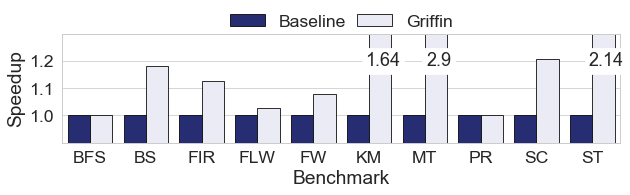

In [8]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=stacked_data, 
            x='Benchmark', hue='Configuration', y='Speedup', 
            palette=['#1A237E', '#E8EAF6'], ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.33), loc=9, ncol=2)
ax.set_ylim(0.9, 1.3)
ax.set_yticks([1.0, 1.1, 1.2])
ax.text(5.25, 1.2, 1.64,  horizontalalignment='center', verticalalignment='center',
        fontsize=18, bbox=dict(facecolor='white'))
ax.text(6.25, 1.2, 2.90,   horizontalalignment='center', verticalalignment='center',
        fontsize=18, bbox=dict(facecolor='white'))
ax.text(9.25, 1.2, 2.14,  horizontalalignment='center', verticalalignment='center',
        fontsize=18, bbox=dict(facecolor='white'))

plt.savefig('perf.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [17]:
geomean = stats.gmean(stacked_data[stacked_data['Configuration'] == 'Griffin']['Speedup'])
geomean

1.336335614175325